In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame as df

In Multiple Linear Regression we have more variables (such as R&D Spend,Administration,Marketing Spend,Profit as in this case of our startup data)

x1, x2, x3, are the three features
x1 - R&D Spend
x2 - Administration
x3 - Marketing Spend 

y is the output variable (Profit)


More notation:

n  number of features (n = 3)  
m  number of examples (i.e. number of rows in a table)

Now we have multiple features

What is the form of our hypothesis? 

Previously our hypothesis took the form
h(x) = β0 + β1x

Where we have two parameters (beta 0  and beta 1) determined by our cost function and One variable x

Now we have multiple features

h(x) = β0 + β1x1 + β2x2 + β3x3



In [2]:
my_data = np.genfromtxt('50_Startups.csv', delimiter=',',skip_header=1) # Lets read the data

In [3]:
# my_data  = data[1:] # Removing Data Header Line (As they are NaN Values) 
# Commenting as np.genfromtxt function has a skip_header method that's one less line of code :)

# Normalising the Data as there is lot of difference in data point values, Causing Overflow in Gradient Calculation
my_data = (my_data - my_data.mean())/my_data.std() 

In [4]:
# Splitting my_data into X and y arrays which will form the X and y Vectors
x = my_data[0: , :-1]
y = my_data[0: , -1:]

In [5]:
y.shape

(46, 1)

In [6]:
ones = np.ones([x.shape[0],1])

In [7]:
X = np.concatenate((ones,x),axis=1)

In [8]:
X.shape

(46, 4)

In [9]:
# Intial Beta Values 
beta = np.zeros([1,4])

In [10]:
beta

array([[0., 0., 0., 0.]])

In [11]:
#Setting Learning Rate and Iterations 

alpha = 0.01
iters = 6000

Cost Function:

## $$ J(β) = \frac{1}{2m } \sum_{i=1}^{m}(h(β)^i-y^i)^2$$   


Gradient:

## $$  \frac{\partial J(β)}{\partial β_j} = \frac{1}{m}\sum_{i=1}^{m}(h(β)^i-y^i).X^i_j$$


For Multivariables the Gradient can be calculated as:

## $$β_j := β_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h(β)^i-y^i).X^i_j$$

where alpha is learning rate.

In [12]:
def computeCost(X,y,beta):
    do_summation = np.power(((X @ beta.T)-y),2)
    return np.sum(do_summation)/(2 * len(X))

In [13]:
#Gradient Descent

DELTA_COST_THRESH = 0.00001
i=0
def gradientDescent(X,y,beta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - y), axis=0)
        cost[i] = computeCost(X, y, beta)
        
        # Stopping process based on Relative Change in Cost in successive Iterations.
        # If Relative Change in cost is less than DELTA_COST_THRESH than Stop the Gradient Descent Process
        if i>2:
            if ((cost[i-1]-cost[i])/cost[i-1])<DELTA_COST_THRESH:
                print("Stopped at " + str(i) + " Iteration")
                break
        
    return beta,cost


#running the gd and cost function
g,cost = gradientDescent(X,y,beta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

Stopped at 5835 Iteration
[[ 0.25200897  0.75326271 -0.04407123  0.02720421]]
0.003526984207141566


In [27]:
g[0]

array([ 0.25200897,  0.75326271, -0.04407123,  0.02720421])

Text(0.5, 1.0, 'Error vs. Training Epoch')

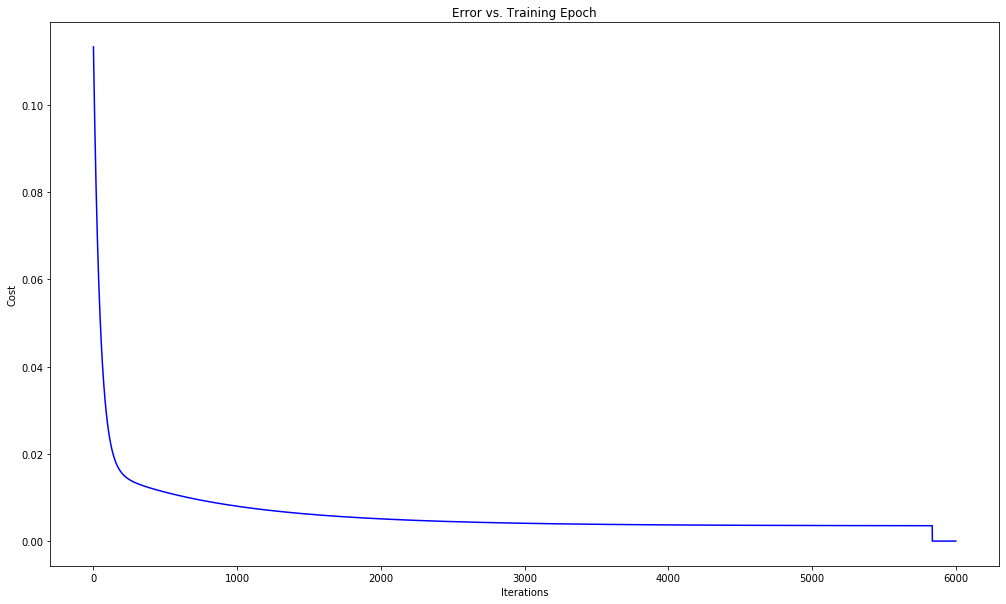

In [14]:
#plot the cost
plt.figure(figsize=[17, 10])

 
plt.plot(np.arange(iters), cost, 'b')  
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Epoch') 

In [15]:
# Testing prediction for just one  input value(first row of data) here:
def predict(RD,Adm,Mar):
    y_pred = (g[0][0] + g[0][1]*RD + g[0][2]*Adm + g[0][3]*Mar)
    return y_pred
    

In [16]:
# We see we are pretty close to the actual profit values 

pred_profit  = predict(0.34,0.005,3.98)
print(pred_profit)

0.6161706921796923


## Lets use the Scikit Learn

In [17]:
df = pd.DataFrame(my_data)

In [18]:
x = df[[0,1,2]]

In [19]:
y = df[3]

In [20]:
regr = LinearRegression()


In [21]:
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
regr.coef_

array([ 0.77712216, -0.06028686,  0.0192574 ])

In [23]:
regr.intercept_

0.27554777581870216

In [24]:
regr.score(x,y)

0.9608231830180131

In [25]:
# Observed our Intercept and coeff values of scratch python and scikit learn lib are very close match.

# Lets test our Prediction with just one row of data and our manual and scikit learn predictions match

xp = df.iloc[[0],[0,1,2]]
regr.predict(xp)

array([0.61879078])